# Задача классификации (предсказание type)

## Описание датасета
Аниме — популярный вид развлечения родом из Японии. Он включает в себя широкий спектр анимационных телесериалов, фильмов и OVA (оригинальных видео-анимаций), рассчитанных на различные жанры и целевые аудитории. Аниме известно своим самобытным художественным стилем, захватывающим повествованием и разнообразием тем.
Аниме охватывает широкий спектр жанров, включая боевики, приключения, комедии, драмы, мелодрамы, фэнтези, научную фантастику и многие другие. Каждый жанр предлагает уникальные элементы повествования и отвечает различным предпочтениям и интересам любителей аниме. Он приобрел значительную популярность во всем мире и приобрел преданных и страстных поклонников. Поклонники аниме часто участвуют в обсуждениях, обзорах и рейтингах, внося свой вклад в активное сообщество, окружающее этот вид развлечений.
Из-за огромного количества доступных аниме рекомендации играют решающую роль, помогая энтузиастам открыть для себя новые шоу, соответствующие их интересам. Системы рекомендаций используют рейтинги пользователей, жанры и другие факторы, чтобы предлагать аниме-сериалы, которые могут понравиться пользователям, исходя из их предпочтений.

Content

----------------------------------------------------------------"anime-dataset-2023.csv"-------------------------------------------------------
anime_id: Unique ID for each anime.

Name: The name of the anime in its original language.

English name: The English name of the anime.

Other name: Native name or title of the anime(can be in Japanese, Chinese or Korean).

Score: The score or rating given to the anime.

Genres: The genres of the anime, separated by commas.

Synopsis: A brief description or summary of the anime's plot.

Type: The type of the anime (e.g., TV series, movie, OVA, etc.).

Episodes: The number of episodes in the anime.

Aired: The dates when the anime was aired.

Premiered: The season and year when the anime premiered.

Status: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).

Producers: The production companies or producers of the anime.

Licensors: The licensors of the anime (e.g., streaming platforms).

Studios: The animation studios that worked on the anime.

Source: The source material of the anime (e.g., manga, light novel, original).

Duration: The duration of each episode.

Rating: The age rating of the anime.

Rank: The rank of the anime based on popularity or other criteria.

Popularity: The popularity rank of the anime.

Favorites: The number of times the anime was marked as a favorite by users.

Scored By: The number of users who scored the anime.

Members: The number of members who have added the anime to their list on the platform.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

## Загружаем датасет

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Визуализируем данные

In [3]:
dataframe = pd.read_csv('/content/drive/MyDrive/ML2024/anime-dataset-2023.csv')

## Выделяем нужные нам данные

In [4]:
dataframe_columns = ["Score", "Genres", "Type", "Episodes", "Producers", "Licensors", "Studios", "Source", "Duration", "Rating", "Favorites", "Scored By"]
dataframe = dataframe.loc[:,dataframe_columns]
dataframe_num = ["Scored By", "Episodes", "Score", "Favorites", "Duration"]
dataframe_str = [e for e in dataframe_columns if e not in dataframe_num]
all_sources = dataframe["Source"].unique()
all_sources = "Source_" + np.delete(all_sources, all_sources == "Unknown")

## Приводим "длительность" к единому формату

In [5]:
def parse_duration(d):
    if (d == "Unknown"):
        return "UNKNOWN"
    x = list(filter(str.isnumeric, d.split(' ')))
    if (len(x) == 1 and "hr" in d):
        return str(int(x[0]) * 60)
    if (len(x) == 1):
        return x[0]
    if (len(x) == 2):
        return str(int(x[0]) * 60 + int(x[1]))
    return "UNKNOWN"
dataframe["Duration"] = dataframe["Duration"].apply(parse_duration)

In [6]:
for c in dataframe_num:
    dataframe = dataframe[dataframe[c] != "UNKNOWN"]
    dataframe[c] = dataframe[c].astype(np.float64)

In [7]:
dataframe

,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Duration,Rating,Favorites,Scored By
0,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,R - 17+ (violence & profanity),78525.0,914193.0
1,8.38,"Action, Sci-Fi",Movie,1.0,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,115.0,R - 17+ (violence & profanity),1448.0,206248.0
2,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,PG-13 - Teens 13 or older,15035.0,356739.0
3,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,PG-13 - Teens 13 or older,613.0,42829.0
4,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23.0,PG - Children,14.0,6413.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24590,5.99,"Action, Comedy, Mystery",ONA,1.0,UNKNOWN,UNKNOWN,"HMCH, Gravity Well",Game,3.0,PG-13 - Teens 13 or older,1.0,129.0
24635,6.45,UNKNOWN,Music,1.0,MAZRI,UNKNOWN,UNKNOWN,Original,4.0,PG-13 - Teens 13 or older,1.0,152.0
24729,6.07,UNKNOWN,Special,1.0,UNKNOWN,UNKNOWN,CygamesPictures,Web manga,23.0,PG-13 - Teens 13 or older,1.0,114.0
24831,6.29,"Action, Adventure, Comedy, Fantasy",Special,1.0,UNKNOWN,UNKNOWN,UNKNOWN,Manga,24.0,PG-13 - Teens 13 or older,1.0,320.0


In [8]:
dataframe.describe()

,Score,Episodes,Duration,Favorites,Scored By
count,15592.000000,15592.000000,15592.000000,15592.000000,1.559200e+04
mean,6.379840,11.313045,25.423807,673.333504,3.006184e+04
std,0.929593,48.336152,25.061304,5249.507955,1.168915e+05
min,1.850000,1.000000,1.000000,0.000000,1.000000e+02
25%,5.730000,1.000000,6.000000,1.000000,3.840000e+02
50%,6.390000,2.000000,23.000000,7.000000,1.780000e+03
75%,7.060000,12.000000,27.000000,60.250000,1.100800e+04
max,9.100000,3057.000000,168.000000,217606.000000,2.660903e+06


array([[<Axes: xlabel='Score', ylabel='Score'>,
        <Axes: xlabel='Episodes', ylabel='Score'>,
        <Axes: xlabel='Duration', ylabel='Score'>,
        <Axes: xlabel='Favorites', ylabel='Score'>,
        <Axes: xlabel='Scored By', ylabel='Score'>],
       [<Axes: xlabel='Score', ylabel='Episodes'>,
        <Axes: xlabel='Episodes', ylabel='Episodes'>,
        <Axes: xlabel='Duration', ylabel='Episodes'>,
        <Axes: xlabel='Favorites', ylabel='Episodes'>,
        <Axes: xlabel='Scored By', ylabel='Episodes'>],
       [<Axes: xlabel='Score', ylabel='Duration'>,
        <Axes: xlabel='Episodes', ylabel='Duration'>,
        <Axes: xlabel='Duration', ylabel='Duration'>,
        <Axes: xlabel='Favorites', ylabel='Duration'>,
        <Axes: xlabel='Scored By', ylabel='Duration'>],
       [<Axes: xlabel='Score', ylabel='Favorites'>,
        <Axes: xlabel='Episodes', ylabel='Favorites'>,
        <Axes: xlabel='Duration', ylabel='Favorites'>,
        <Axes: xlabel='Favorites', ylabel='

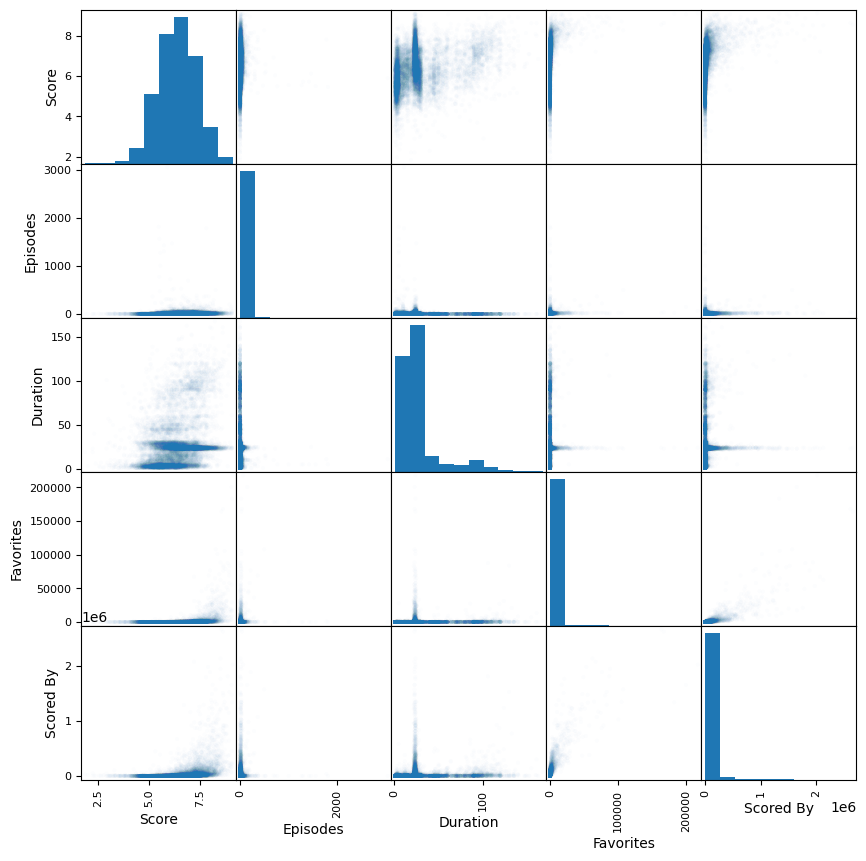

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataframe, alpha = .01, figsize = (10, 10))

## Исключаем значения типа UNKNOWN и Unknown

In [10]:
for e in ("Genres", "Producers", "Licensors", "Studios"):
    genres_column = dataframe[e]
    tmp = genres_column.str.get_dummies(sep=", ")
    tmp = tmp.drop(columns=["UNKNOWN"], errors="ignore")
    tmp = tmp.drop(columns=["Unknown"], errors="ignore")
    tmp = tmp.add_prefix(e + '_')
    dataframe = pd.concat([dataframe.drop(columns=[e]), tmp], axis=1)
print(dataframe.columns)

Index(['Score', 'Type', 'Episodes', 'Source', 'Duration', 'Rating',
       'Favorites', 'Scored By', 'Genres_Action', 'Genres_Adventure',
       ...
       'Studios_ixtl', 'Studios_l-a-unch・BOX', 'Studios_monofilmo',
       'Studios_pH Studio', 'Studios_production doA', 'Studios_studio MOTHER',
       'Studios_team Yamahitsuji', 'Studios_teamKG', 'Studios_ufotable',
       'Studios_yell'],
      dtype='object', length=2458)


In [11]:
dataframe

,Score,Type,Episodes,Source,Duration,Rating,Favorites,Scored By,Genres_Action,Genres_Adventure,...,Studios_ixtl,Studios_l-a-unch・BOX,Studios_monofilmo,Studios_pH Studio,Studios_production doA,Studios_studio MOTHER,Studios_team Yamahitsuji,Studios_teamKG,Studios_ufotable,Studios_yell
0,8.75,TV,26.0,Original,24.0,R - 17+ (violence & profanity),78525.0,914193.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8.38,Movie,1.0,Original,115.0,R - 17+ (violence & profanity),1448.0,206248.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8.22,TV,26.0,Manga,24.0,PG-13 - Teens 13 or older,15035.0,356739.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,7.25,TV,26.0,Original,25.0,PG-13 - Teens 13 or older,613.0,42829.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6.94,TV,52.0,Manga,23.0,PG - Children,14.0,6413.0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,5.99,ONA,1.0,Game,3.0,PG-13 - Teens 13 or older,1.0,129.0,1,0,...,0,0,0,0,0,0,0,0,0,0
24635,6.45,Music,1.0,Original,4.0,PG-13 - Teens 13 or older,1.0,152.0,0,0,...,0,0,0,0,0,0,0,0,0,0
24729,6.07,Special,1.0,Web manga,23.0,PG-13 - Teens 13 or older,1.0,114.0,0,0,...,0,0,0,0,0,0,0,0,0,0
24831,6.29,Special,1.0,Manga,24.0,PG-13 - Teens 13 or older,1.0,320.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
for e in ("Type", "Source", "Rating"):
    tmp = pd.get_dummies(dataframe[e], dtype=np.int64)
    tmp = tmp.drop(columns=["UNKNOWN"], errors="ignore")
    tmp = tmp.drop(columns=["Unknown"], errors="ignore")
    tmp = tmp.add_prefix(e + '_')
    dataframe = pd.concat([dataframe.drop(columns=[e]), tmp], axis=1)

In [13]:
dataframe

,Score,Episodes,Duration,Favorites,Scored By,Genres_Action,Genres_Adventure,Genres_Avant Garde,Genres_Award Winning,Genres_Boys Love,...,Source_Radio,Source_Visual novel,Source_Web manga,Source_Web novel,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Rx - Hentai
0,8.75,26.0,24.0,78525.0,914193.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,8.38,1.0,115.0,1448.0,206248.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,8.22,26.0,24.0,15035.0,356739.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.25,26.0,25.0,613.0,42829.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6.94,52.0,23.0,14.0,6413.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,5.99,1.0,3.0,1.0,129.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24635,6.45,1.0,4.0,1.0,152.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24729,6.07,1.0,23.0,1.0,114.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
24831,6.29,1.0,24.0,1.0,320.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Начинаем векторизацию

In [14]:
dataframe_num_data = dataframe[dataframe_num]
dataframe_num_data.describe()

,Scored By,Episodes,Score,Favorites,Duration
count,1.559200e+04,15592.000000,15592.000000,15592.000000,15592.000000
mean,3.006184e+04,11.313045,6.379840,673.333504,25.423807
std,1.168915e+05,48.336152,0.929593,5249.507955,25.061304
min,1.000000e+02,1.000000,1.850000,0.000000,1.000000
25%,3.840000e+02,1.000000,5.730000,1.000000,6.000000
50%,1.780000e+03,2.000000,6.390000,7.000000,23.000000
75%,1.100800e+04,12.000000,7.060000,60.250000,27.000000
max,2.660903e+06,3057.000000,9.100000,217606.000000,168.000000


In [15]:
dataframe_num_data = (dataframe_num_data - dataframe_num_data.mean(axis = 0))/dataframe_num_data.std(axis = 0)
dataframe_num_data.describe()

,Scored By,Episodes,Score,Favorites,Duration
count,1.559200e+04,1.559200e+04,1.559200e+04,1.559200e+04,15592.000000
mean,-1.822839e-18,-1.458271e-17,-5.833086e-17,-1.822839e-18,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-2.563218e-01,-2.133609e-01,-4.872930e+00,-1.282660e-01,-0.974562
25%,-2.538922e-01,-2.133609e-01,-6.990585e-01,-1.280755e-01,-0.775052
50%,-2.419495e-01,-1.926725e-01,1.092988e-02,-1.269326e-01,-0.096715
75%,-1.630045e-01,1.421203e-02,7.316757e-01,-1.167888e-01,0.062893
max,2.250669e+01,6.301054e+01,2.926185e+00,4.132438e+01,5.689097


In [16]:
dataframe_num_data

,Scored By,Episodes,Score,Favorites,Duration
0,7.563690,0.303850,2.549676,14.830279,-0.056813
1,1.507262,-0.213361,2.151652,0.147569,3.574283
2,2.794704,0.303850,1.979534,2.735812,-0.056813
3,0.109222,0.303850,0.936066,-0.011493,-0.016911
4,-0.202314,0.841750,0.602587,-0.125599,-0.096715
...,...,...,...,...,...
24590,-0.256074,-0.213361,-0.419366,-0.128076,-0.894758
24635,-0.255877,-0.213361,0.075474,-0.128076,-0.854856
24729,-0.256202,-0.213361,-0.333307,-0.128076,-0.096715
24831,-0.254440,-0.213361,-0.096644,-0.128076,-0.056813


## Завершение векторизации

In [17]:
dataframe = pd.concat([dataframe.drop(columns=dataframe_num), dataframe_num_data], axis=1)
dataframe

,Genres_Action,Genres_Adventure,Genres_Avant Garde,Genres_Award Winning,Genres_Boys Love,Genres_Comedy,Genres_Drama,Genres_Ecchi,Genres_Erotica,Genres_Fantasy,...,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Rx - Hentai,Scored By,Episodes,Score,Favorites,Duration
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,7.563690,0.303850,2.549676,14.830279,-0.056813
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1.507262,-0.213361,2.151652,0.147569,3.574283
2,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2.794704,0.303850,1.979534,2.735812,-0.056813
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0.109222,0.303850,0.936066,-0.011493,-0.016911
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,-0.202314,0.841750,0.602587,-0.125599,-0.096715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,-0.256074,-0.213361,-0.419366,-0.128076,-0.894758
24635,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,-0.255877,-0.213361,0.075474,-0.128076,-0.854856
24729,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,-0.256202,-0.213361,-0.333307,-0.128076,-0.096715
24831,1,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,-0.254440,-0.213361,-0.096644,-0.128076,-0.056813


## ^-------Векторизация завершена--------^

In [18]:
X = dataframe.drop(columns=all_sources)
y = dataframe[all_sources].to_numpy()
feature_names = X.columns
X = X.to_numpy()
N, d = X.shape

## Разделяем данные на обучающую и тестовую выборки

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

10914 4678


## Применение RFC (Random forest classifier)
Метод достаточно хорошо справляется с несбалансированными классами а также с большим количеством категориальных признаков.

In [20]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.03950673364685763


In [21]:
np.sum(rf.feature_importances_)

0.9999999999999999

In [22]:
importances = rf.feature_importances_
sums = {}
indexes_to_delete = []

for f in range(d):
    tmp = feature_names[f].find('_')
    if not feature_names[f][:tmp] in dataframe_str:
        continue
    tmp = feature_names[f][:tmp]
    if (not tmp in sums.keys()):
        sums[tmp] = 0
    sums[tmp] += importances[f]
    indexes_to_delete.append(f)

importances = list(np.delete(importances, indexes_to_delete))
feature_names = list(np.delete(feature_names, indexes_to_delete))

importances.extend(sums.values())
feature_names.extend(sums.keys())

importances = np.array(importances, dtype=np.float64)
feature_names = np.array(feature_names)

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(len(feature_names)):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Producers' (0.226139)
 2. feature 'Studios' (0.184287)
 3. feature 'Genres' (0.137401)
 4. feature 'Score' (0.080526)
 5. feature 'Scored By' (0.079225)
 6. feature 'Duration' (0.063486)
 7. feature 'Favorites' (0.057174)
 8. feature ' Type' (0.047756)
 9. feature 'Rating' (0.046939)
10. feature 'Licensors' (0.041824)
11. feature 'Episodes' (0.035242)


(-1.0, 11.0)

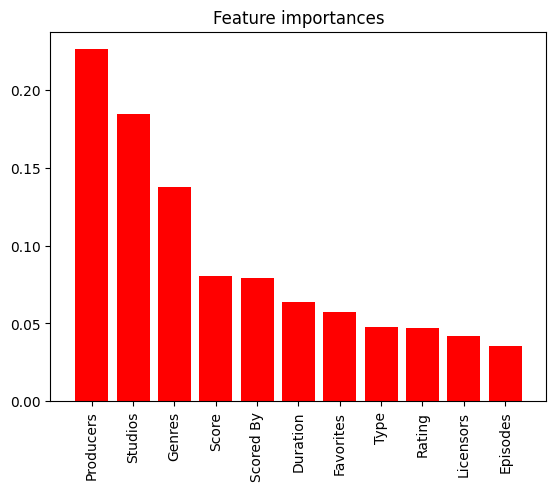

In [23]:
d_first = min(len(feature_names), 20)
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Вывод
Модель хорошо показала себя на тестовой выборке 0.3% ошибки. В дальнейшем можно будет использовать рейтинги, жанры и другие факторы, чтобы предлагать аниме-сериалы, которые могут понравиться пользователям, что поможет построить очень хорошую систему рекомендаций, исходя из предпочтений зрителя.